In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
df = pd.read_csv('/content/gdrive/MyDrive/Praktikum_ML/praktikum_05/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [32]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [33]:
df.duplicated().sum()

np.int64(7308)

In [34]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df = df.rename(columns= {
    'Jenis Kelamin' : 'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)' : 'tinggi_cm',
    'Berat Badan (kg)' : 'berat_kg',
    'Stunting' : 'stunting',
    'Wasting' : 'wasting'
})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


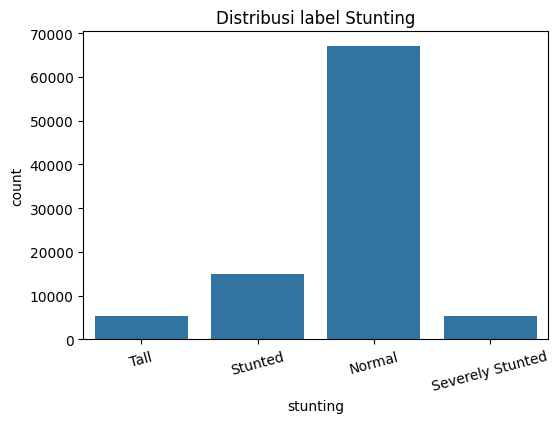

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [39]:
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)
df['stunting'] = stunting_cat.cat.codes

for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


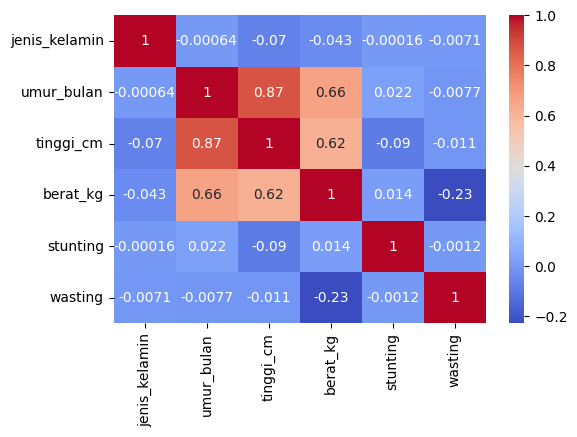

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stunting', data=df)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [41]:
# Memilih fitur dan target
feature_cols = ['umur_bulan','tinggi_cm','berat_kg','wasting']
X = df[feature_cols]
y = df['stunting']
# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(74153, 18539)

In [42]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [43]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes
))


Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



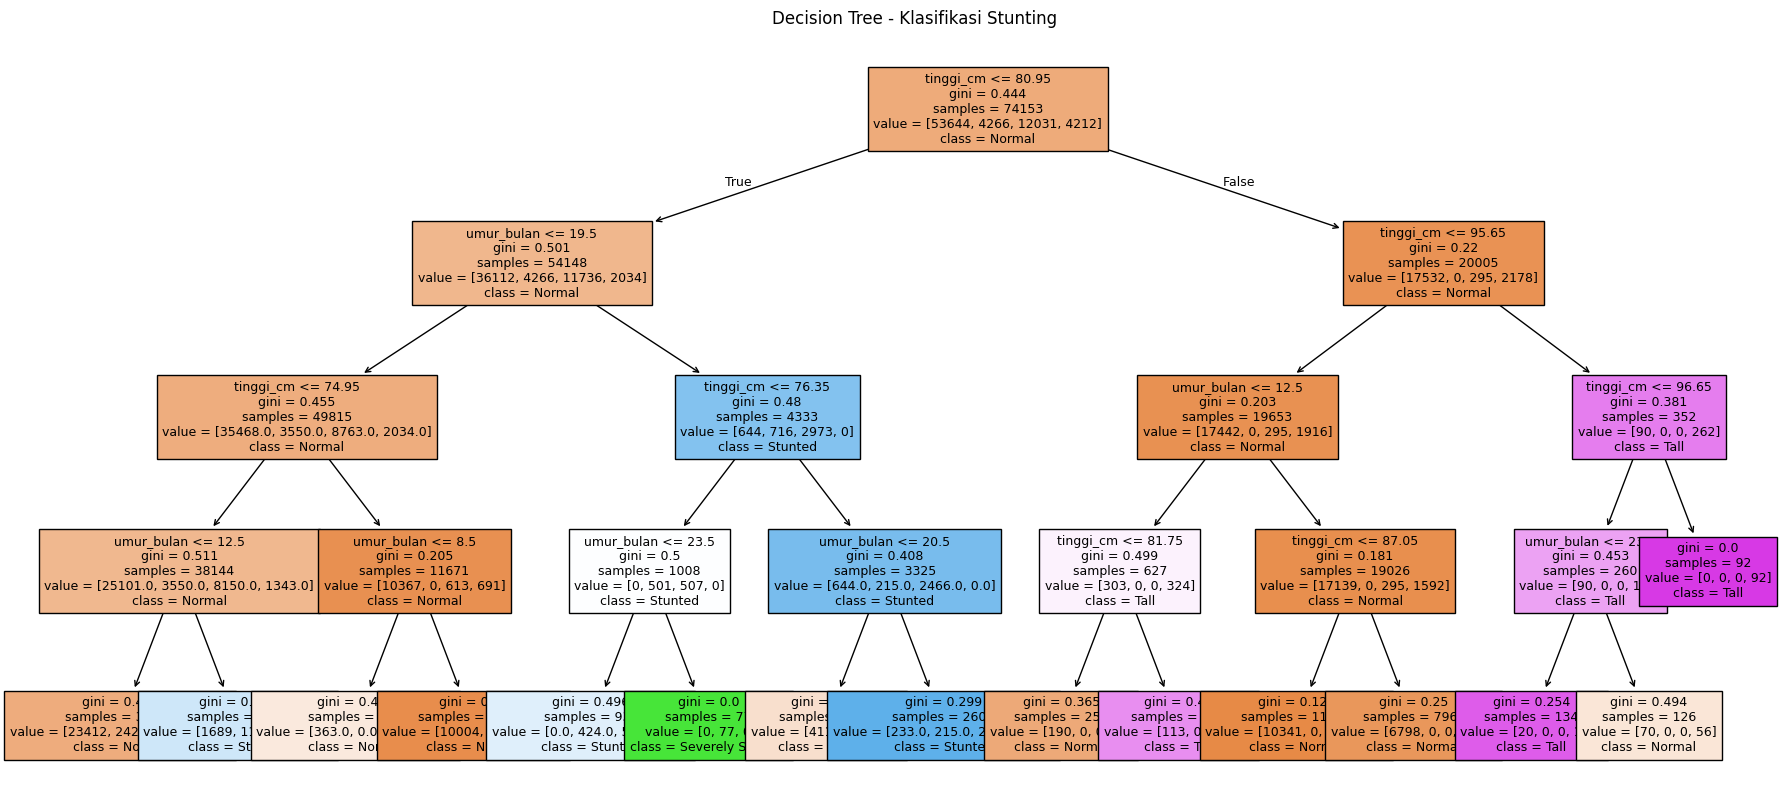

In [44]:
plt.figure(figsize=(22,10))
plot_tree(dt,
          feature_names=feature_cols,
          class_names=stunting_classes,
          filled=True,
          fontsize=9)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()

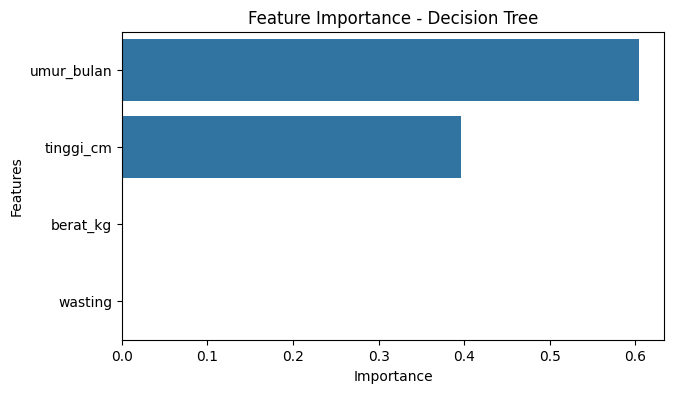

In [45]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [46]:
scores = {}
for d in range (2, nine :=9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth: ", best_d, "| ACC", round(scores[best_d]*100, 2), "%")

Best max_depth:  8 | ACC 84.22 %


In [48]:
data = pd.read_csv("/content/gdrive/MyDrive/Praktikum_ML/praktikum_05/data/Iris.csv")
print("Data Awal:")
print(data.head())

X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

Data Awal:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa



Model Decision Tree berhasil dibuat dan dilatih.


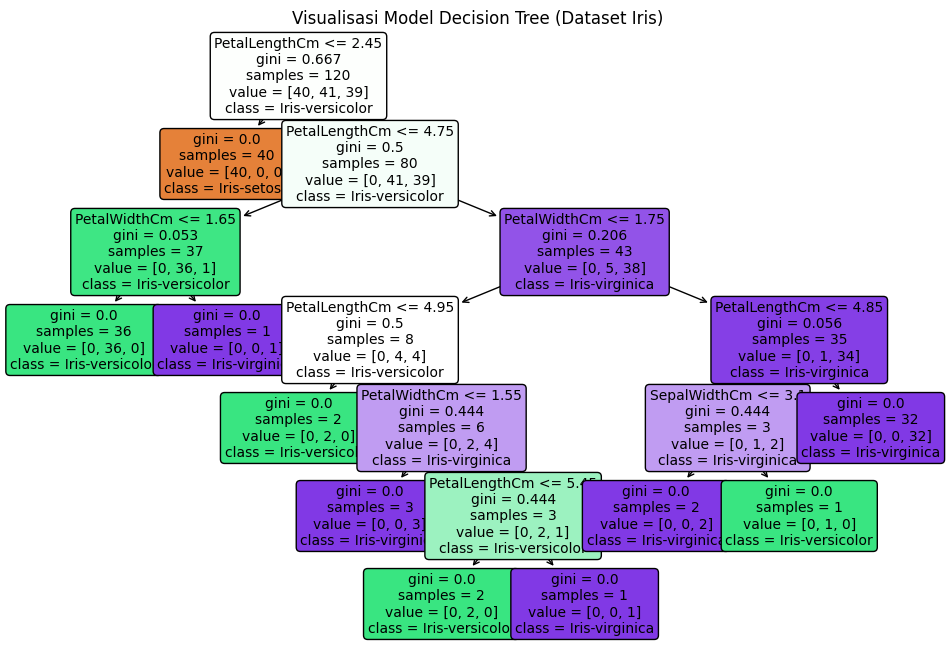

In [55]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Bagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
model.fit(X_train, y_train)

print("\nModel Decision Tree berhasil dibuat dan dilatih.")

# Visualisasi model Decision Tree
plt.figure(figsize=(12,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Model Decision Tree (Dataset Iris)")
plt.show()

In [50]:
# Prediksi data testing
y_pred = model.predict(X_test)

# Hitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", akurasi)

# Tampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Tampilkan Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# (Opsional) Lihat hasil aktual vs prediksi
hasil = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPerbandingan Data Aktual dan Prediksi:")
print(hasil.head())



Akurasi Model: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Perbandingan Data Aktual dan Prediksi:
              Actual        Predicted
73   Iris-versicolor  Iris-versicolor
18       Iris-setosa      Iris-setosa
118   Iris-virginica   Iris-virginica
78   Iris-versicolor  Iris-versicolor
76   Iris-versicolor  Iris-versicolor
